colab에서 압축파일을 풀고 이미지 조회하기 
1. 압축파일 업로드 : 내드라이브/dataset/cat_and_dog.zip
2. 코랩에서 파일 읽기 : 파일 마운트하기
3. 압축파일을 메모리에 풀기 -> 파일 입출력이 colab이 너무 늦음 

http://www.kaggle.com/tongpython/cat-and-dog

In [1]:
from google.colab import drive 
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
#압축 파일의 위치( 구글 드라이브 - 내 드라이브 위치)
drive_path='/content/drive/MyDrive/'
source_filename=drive_path+'dataset/cat_and_dog.zip'
#저장할 경로 
extract_folder = 'dataset/'
#압축해제하기
import shutil
shutil.unpack_archive(source_filename,extract_folder)

In [2]:
#훈련 셋, 검증 셋 저장위치 저장 
train_dir = extract_folder + 'training_set/training_set'
test_dir = extract_folder + 'test_set/test_set'
print(train_dir)
print(test_dir)

dataset/training_set/training_set
dataset/test_set/test_set


In [3]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
#이미지 데이터 제너레이터 정의 
#rescale로 각 픽셀의 값을 0-1로 정규화 
image_gen=ImageDataGenerator(rescale=(1/255.))

In [5]:
#flow_from_directory 함수 : 폴더에서 이미지 가져와 제너레이터 객첼 정리 
#batch_size : 32개의 이미지를 로드 
#target_size : 이미지 크기 
#class_mode: 이진분류 
#classes: train_dir하위 폴더 
train_gen=image_gen.flow_from_directory(train_dir,
                                        batch_size=32,
                                        target_size=(224,224),
                                        classes=['cats','dogs'],
                                        class_mode='binary',
                                        seed=202)


test_gen=image_gen.flow_from_directory(test_dir,
                                        batch_size=32,
                                        target_size=(224,224),
                                        classes=['cats','dogs'],
                                        class_mode='binary',
                                        seed=202)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


[0. 1. 0. 0. 0. 0. 0. 1. 1. 1.]


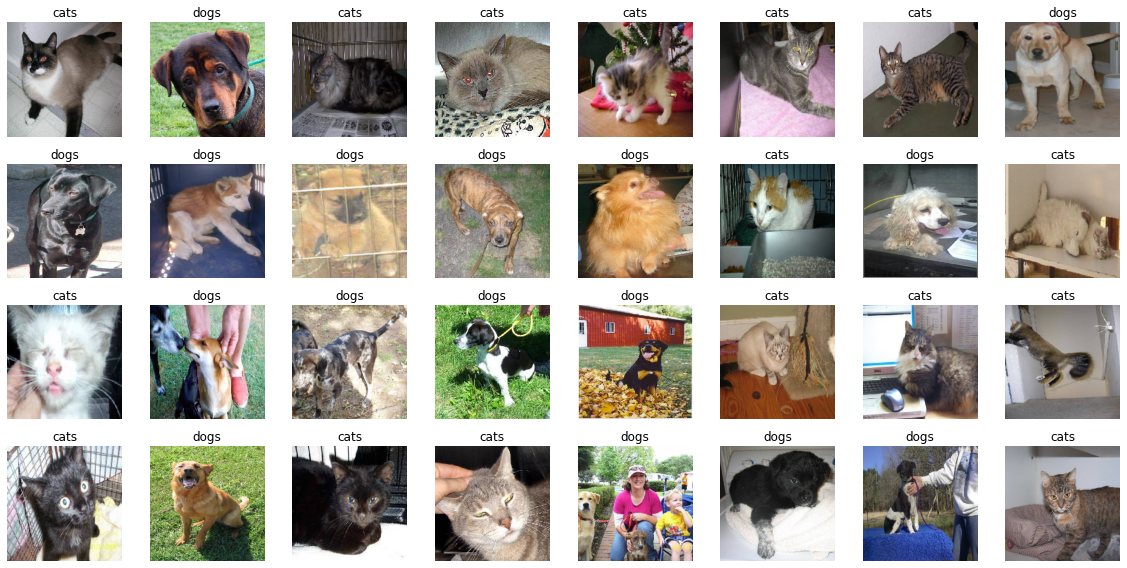

In [6]:
#샘플 이미지 출력 
class_labels=['cats','dogs']
batch=next(train_gen)
image,labels = batch[0], batch[1]
print(labels[:10])
plt.figure(figsize=(16,8))
for i in range(32):
  ax=plt.subplot(4,8,i+1)
  plt.imshow(image[i])
  plt.title(class_labels[labels[i].astype(np.int)])
  plt.axis('off')
plt.tight_layout()
plt.show()
